## Part 1 - Getting Started [1 mark]

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.
3. Explain why we should not insert the column of 1s before standardization. **[0.5]**

In [2]:
# printing dataframe
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
#Importing all relevant libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import linalg
import numpy
from sklearn.metrics import r2_score,accuracy_score
from sklearn.utils import shuffle

In [4]:
#Splitting the training and test dataset
X = df.drop(['Goal'],axis=1)
y = df['Goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [5]:
# Standarizing the dataset
scaler = StandardScaler()

In [6]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [7]:
y_train=np.array(y_train).reshape(-1,1)
#y_train_std = scaler.fit_transform(y_train_std)

y_test=np.array(y_test).reshape(-1,1)
#y_test_std = scaler.fit_transform(y_test_std)

In [8]:
column = list(X.columns)

In [9]:
X_train_df=pd.DataFrame((X_train_std),columns=column)
X_train_df.insert(0, 'First Column of 1s', '1')  # Adding 1s column in the training dataset
X_train_df

,First Column of 1s,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1,1.432311,-1.178261,-0.908495,-0.855532,-1.112426,0.858897,-0.949949,1.334353,-0.298789,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.121629,-0.002769
1,1,-1.168222,0.370836,0.897955,-1.613297,0.793629,0.240743,1.220586,1.813208,0.153133,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.121629,-0.290089
2,1,-0.831683,-1.565535,0.963644,-0.350355,2.794987,-1.407668,-0.467608,0.376642,0.981656,...,0.159414,0.0,0.162423,0.003218,-6.084065,0.011988,-6.323594,0.01101,2.929500,2.870438
3,1,-0.739899,0.564473,-1.598231,0.659998,0.317116,0.446794,0.497074,-0.485298,-1.955834,...,0.159414,0.0,-1.457390,0.003218,-1.404451,0.011988,-1.464727,0.01101,-0.630151,-0.290089
4,1,-0.043874,1.339022,-0.645739,-0.097767,-0.254701,-0.583462,0.738245,-0.197985,-0.072828,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.630151,-0.433750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1,-0.082117,0.293381,-0.448671,-0.350355,-0.350004,-0.686488,0.255904,0.568184,0.002492,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.630151,-0.721070
10996,1,0.942798,-0.171348,-0.908495,0.659998,-0.000560,0.652846,0.979415,0.185099,-0.449429,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,1.403935,1.290174
10997,1,0.105274,1.765024,1.587691,1.838743,0.094742,0.343769,-2.396972,-0.581069,-0.750710,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,0.386892,0.428212
10998,1,1.485851,0.913020,-1.368319,-0.855532,-1.588940,0.652846,1.220586,1.334353,-0.072828,...,0.159414,0.0,0.162423,0.003218,0.155420,0.011988,0.154895,0.01101,-0.630151,-0.721070


In [10]:
X_test_df=pd.DataFrame((X_test_std),columns=column)
X_test_df.insert(0, 'First Column of 1s', '1') # Adding 1s column in the test dataset
X_test_df

,First Column of 1s,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1,0.687809,1.086950,0.552352,0.942001,-0.634974,0.265313,0.230873,-0.989393,0.506094,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,-0.111895,-0.136102
1,1,0.048629,-0.639885,0.320459,-0.848493,-0.408588,0.161749,0.713505,0.581923,0.124707,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,-0.618832,-0.566476
2,1,0.095685,-0.011945,-1.104030,-0.422185,0.788022,-1.495280,0.954821,0.483715,0.048429,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,1.408916,1.298477
3,1,0.252539,0.066547,-0.706498,1.879879,0.885045,-0.563201,-0.734390,-1.971466,0.353539,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,1.915852,1.872308
4,1,-0.378798,0.302025,0.287331,-1.189539,-0.052839,0.886698,0.230873,0.680130,-0.638067,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,-0.618832,-0.709934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,1,-0.065090,-0.561393,0.983011,-0.251661,0.011843,-0.873894,-0.734390,0.680130,0.582371,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,-0.111895,-0.136102
2746,1,1.225034,-2.209735,-0.905264,-1.104278,-0.505611,1.093827,-0.493074,1.171166,-1.553396,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,0.901979,0.868103
2747,1,0.515270,-1.464056,0.452969,-0.848493,-0.764337,0.472441,1.196136,0.581923,-0.104126,...,0.155803,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,-0.618832,-0.709934
2748,1,-1.668923,-1.189332,1.115522,-0.848493,1.111431,0.886698,-0.251758,1.465788,1.040035,...,-3.521946,0.0,0.174978,0.019073,0.167952,0.025592,0.163768,0.026454,-0.111895,-0.279560


- Standrization is done is provide a more comparable platform between the features to further minimize the losses.
- Putting 1's after standirization is basically providing a bias to further help in calculating the wights and coefficient effectivly.
- Putting 1's before standrization wont fulfill the need for providing bias in the subsequent methodoly of linear regression.

## Part 2 - Linear Regression - Direct Solution [1 marks]

Implement the direct solution to linear regression on the training set. **[0.5]**

Report the root-mean-square error (RMSE) for both the training and validation sets.**[0.5]**

In [11]:
from sklearn import metrics
from sklearn.metrics import make_scorer, confusion_matrix,roc_curve, accuracy_score,classification_report,roc_auc_score

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
## Insert 1's as bias column
X_train = np.insert(X_train, 0 ,np.ones(X_train.shape[0]), axis=1)
X_test = np.insert(X_test, 0, np.ones(X_test.shape[0]), axis=1)

In [14]:
# Direct analytical solution
W = np.dot(linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))

In [15]:
# prediction
yPred = np.dot(X_train, W)

In [16]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [17]:
print('RMSE Pred for the training data: ', rmse(yPred, y_train))

RMSE Pred for the training data:  0.00018396021697972368


In [18]:
# prediction for the testing data
yPred1 = np.dot(X_test, W)

In [19]:
print('RMSE Pred for the testing data: ', rmse(yPred1, y_test))

RMSE Pred for the testing data:  0.000174115866786838


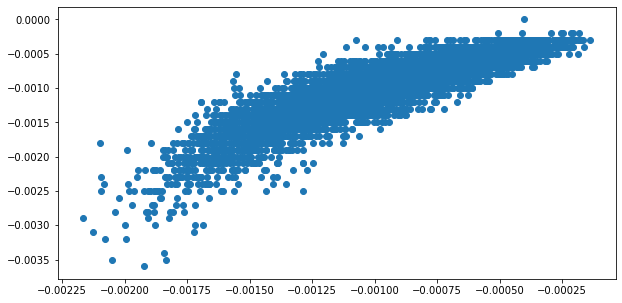

In [20]:
plt.figure(figsize=(10,5))
plt.plot(yPred,y_train,'o')
plt.show()

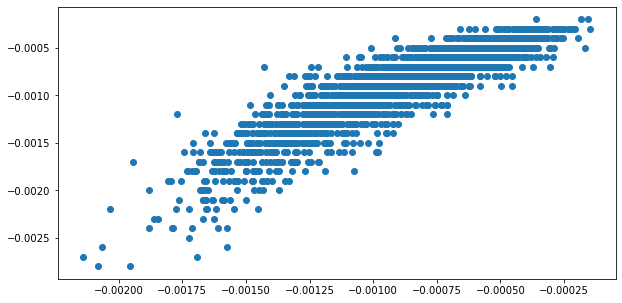

In [21]:
plt.figure(figsize=(10,5))
plt.plot(yPred1,y_test,'o')
plt.show()

## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a full batch gradient descent algorithm and record the training time for our model.

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's **validation** RMSE converges. Here we will consider it converged once **validation RMSE is within 0.1% of the Direct Solution RMSE on the validation set** (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value **Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$)** and will use this value in the next parts too.

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.**[0.5]**

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). **[0.5]**

2. Comment on overfitting/underfitting? **[1]**

**Hint**: 

Initialize your weights with small random numbers (<$0.001$)

In [22]:
import time
start_time = time.time()

rmse_ds=rmse(yPred1, y_test) 
ct = round((rmse_ds*1.001),4) #Convergence Threshold value
#print("Convergence Threshold Value for the set:", ct)

w = (np.random.random(X_train.shape[1])/1000).reshape(1,-1) ### Inital weights


lr = 0.01  ### Learning rate

rmse_array1=[] # Training rmse
rmse_array2=[] # Testing rmse

for epoch in range (0, 1000): 
    y1 = np.dot(X_train,w.T).reshape(-1,1)
    rmse_array1.append(round(rmse(y1,y_train),4))
    gradient = (1/len(y1) * np.dot(X_train.T, y1-y_train)).reshape(1,-1)
    
    y2 = np.dot(X_test,w.T).reshape(-1,1)
    rmse_array2.append(round(rmse(y2,y_test),4))
    
    w = w - lr * gradient ### weight update
    
    if ct in rmse_array2:
        break
    #print ("Stopped Itiration for training set :", iter )
      


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 0.21075773239135742 (s) ---


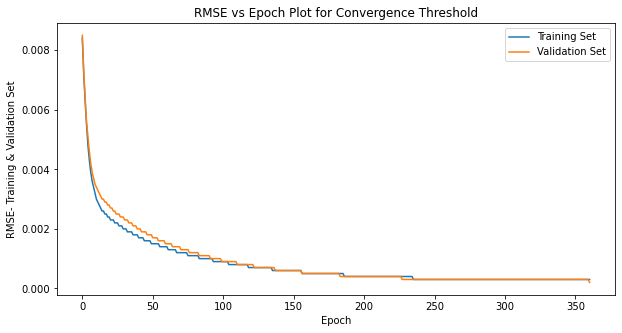

In [23]:
plt.figure(figsize=(10,5))
plt.plot(rmse_array1,label='Training Set')
plt.plot(rmse_array2,label='Validation Set')
plt.xlabel("Epoch")
plt.ylabel("RMSE- Training & Validation Set")
plt.legend()
plt.title("RMSE vs Epoch Plot for Convergence Threshold")
plt.show()

In [24]:
print('Testing R2 score for model is', r2_score(y1,y_train))

print('Testing RMSE score for model is', rmse(y1,y_train))

Testing R2 score for model is 0.6066360609525691
Testing RMSE score for model is 0.00025956743058420007


In [25]:
print('Testing R2 score for model is', r2_score(y2,y_test))

print('Testing RMSE score for model is', rmse(y2,y_test))

Testing R2 score for model is 0.6257821019452139
Testing RMSE score for model is 0.0002496975456152824


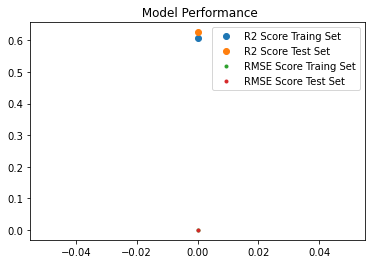

In [26]:
#plt.figure(figsize=(10,7))
plt.plot(r2_score(y1,y_train),'o',label="R2 Score Traing Set")
plt.plot(r2_score(y2,y_test),'o',label="R2 Score Test Set")
plt.plot(rmse(y1,y_train),'.',label="RMSE Score Traing Set")
plt.plot(rmse(y2,y_test),'.',label="RMSE Score Test Set")
plt.legend()
plt.title(" Model Performance")
plt.show()

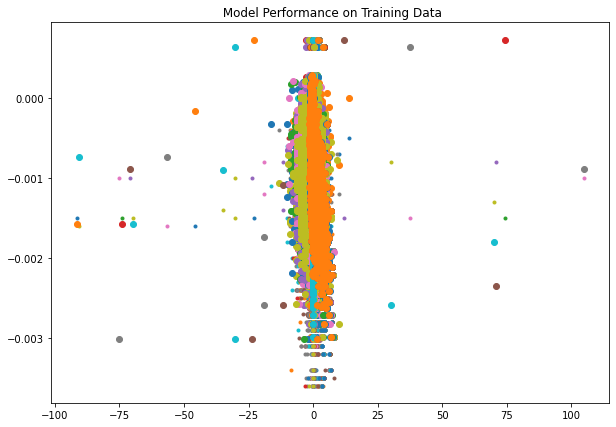

In [27]:
# Plotting Training data of the model created
plt.figure(figsize=(10,7))
plt.plot(X_train, y_train,'.')
plt.plot(X_train,y1, 'o')
plt.title(" Model Performance on Training Data")
plt.show()

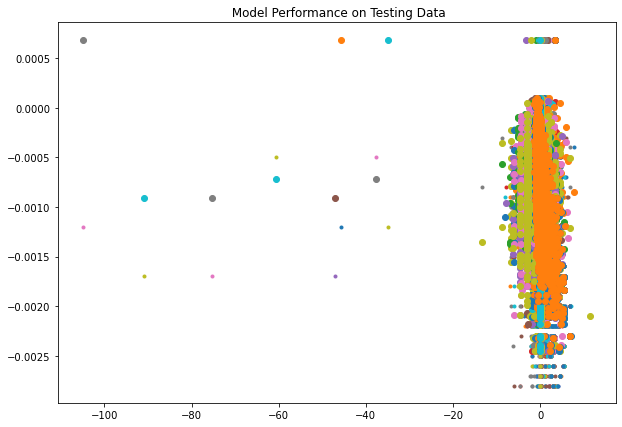

In [28]:
# Plotting Testing data of the model created
plt.figure(figsize=(10,7))
plt.plot(X_test, y_test,'.')
plt.plot(X_test,y2, 'o')
plt.title(" Model Performance on Testing Data")
plt.show()

- Looking at the RMSE score for the training and the validation data, it shows that the model is quite fitted.
- R2 scores also suggest that the model score is not too high as well as too low.
- By looking at the plots, it can be analysed that the model is not picking too much noise.
- Concluding, it can be little bit quite overfit due to the high validation RMSE score but overall i will give it is quite fitted.

## Part 4 - Mini-batch and Stochastic Gradient Descent [3.5 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are 
  * Input data (training/validation)
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* Remember to shuffle the training data after each epoch (select new mini-batches). 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**
  * Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  * Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  * Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [29]:
def gd_batch(X_train,y_train, X_test,y_test,batch_size ,lr ,ct):
    
    start_time = time.time()
    np.random.seed(2) ## Initialization
    n = X_train.shape[0] # shape of the training set
    
    w = (np.random.random(X_train.shape[1])/10000).reshape(1,-1) # Initial Weight
    
    total_time = [] #Time array to store time data
    rmse_train = [] # RMSE training data
    rmse_test = []  # RMSE testing data
    
    
    row_num = 0 #Initial row numner
    max_iter=30000 # Max iteration number
    
    iter = 0 #Initial iteration value
    
    #for iter in range(0,max_iter): 
    while iter <= max_iter:
        x_shuffle, y_shuffle = shuffle(X_train, y_train)  # Shuffling

        ## Start of each itiration
        for i in range(0, x_shuffle.shape[0], batch_size):
            X_batch = x_shuffle[i:i+batch_size]
            y_batch = y_shuffle[i:i+batch_size]
            ytrain1 = np.dot(X_batch, w.T).reshape(-1,1)
            gradient = (1/len(ytrain1) * np.dot(X_batch.T, ytrain1-y_batch)).reshape(1,-1)
            w = w - lr * gradient ## Updated weight
            iter += 1
            row_num = i

        if row_num < n: ## Taking scenario when the last mini batch has less rows than batch size
            X_batch = x_shuffle[row_num:]
            y_batch = y_shuffle[row_num:]
            ytrain1 = np.dot(X_batch, w.T).reshape(-1,1)
            gradient = (1/len(ytrain1) * np.dot(X_batch.T, ytrain1-y_batch)).reshape(1,-1)
            w = w - lr * gradient ## Updated weight
            iter += 1

        ## Total time consumed at each itiration process
        iti_time = time.time() - start_time
        total_time.append(iti_time)

        ## Training RMSE
        ytrain_iti = np.dot(X_train, w.T).reshape(-1,1)
        rmse_train.append(rmse(ytrain_iti, y_train))

        ## Test RMSE
        ytest_iti = np.dot(X_test, w.T).reshape(-1,1)
        rmse_test.append(rmse(ytest_iti, y_test))

        ## Check for convergence threshold condition
        if rmse(ytest_iti, y_test) <= ct:
            break

    return w, rmse_train, rmse_test, total_time

In [30]:
ct= rmse_ds*1.001 
w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test, y_test, 100, 0.01, ct)
w, rmse_train, rmse_test, total_time 

(array([[-8.41317682e-04,  3.72149531e-06,  1.38934205e-05,
         -1.21778308e-04,  1.76399675e-05,  6.88714399e-06,
         -6.90507993e-05,  2.32832163e-04, -1.16190387e-05,
          3.59680724e-05,  9.52484096e-06, -1.16542719e-05,
         -4.80189892e-05, -1.01000930e-05, -4.29737558e-05,
          1.71814755e-05,  2.57202577e-05, -9.94834964e-06,
          2.67180358e-05, -4.99509304e-05, -4.67987408e-06,
         -4.83082308e-05, -9.76383064e-06, -4.25098629e-05,
         -3.67785903e-05, -2.50056069e-06,  7.36336232e-06,
          1.42315325e-07, -1.76097281e-05, -1.58628068e-06,
         -9.23670585e-06, -8.68509548e-06, -5.86360918e-06,
         -3.04054867e-06,  7.71568861e-06,  7.52134717e-07,
          1.52957079e-06,  6.93258022e-06, -8.54776258e-06,
          2.09432942e-05,  4.70335237e-05]]),
 [0.0003727522027811029, 0.00021059671217756878, 0.0001825201262703205],
 [0.0003630622351672696, 0.00021524793079168034, 0.0001734464714429367],
 [0.0052471160888671875, 0.0

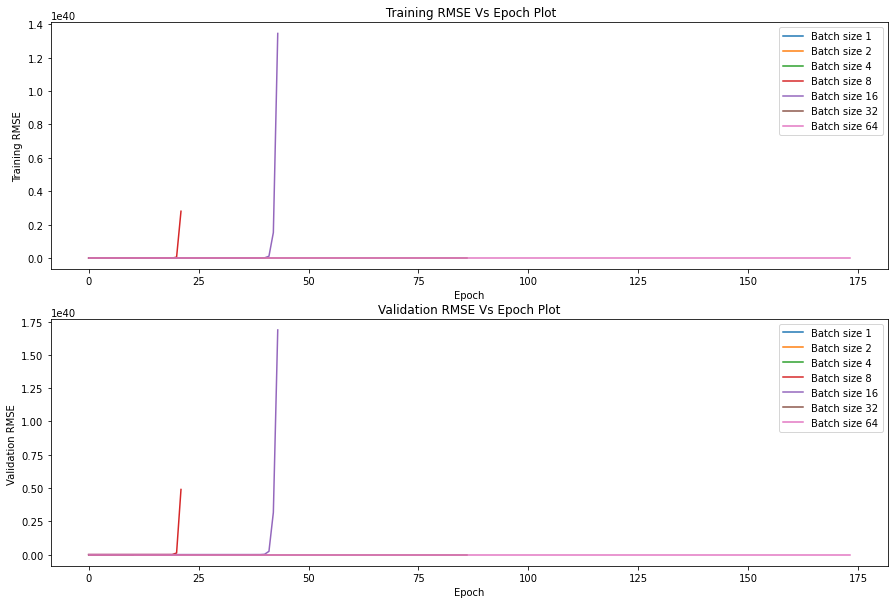

In [31]:
## Plotting separate RMSE curves for training as well as validation set

batch_number = [1,2,4,8,16,32,64] #  Selecting different range of batch size to see the proper scaling of RMSE 

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in batch_number:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, i, 0.01, ct)
    
    axes.flat[0].plot(rmse_train, label='Batch size '+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='Batch size '+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')

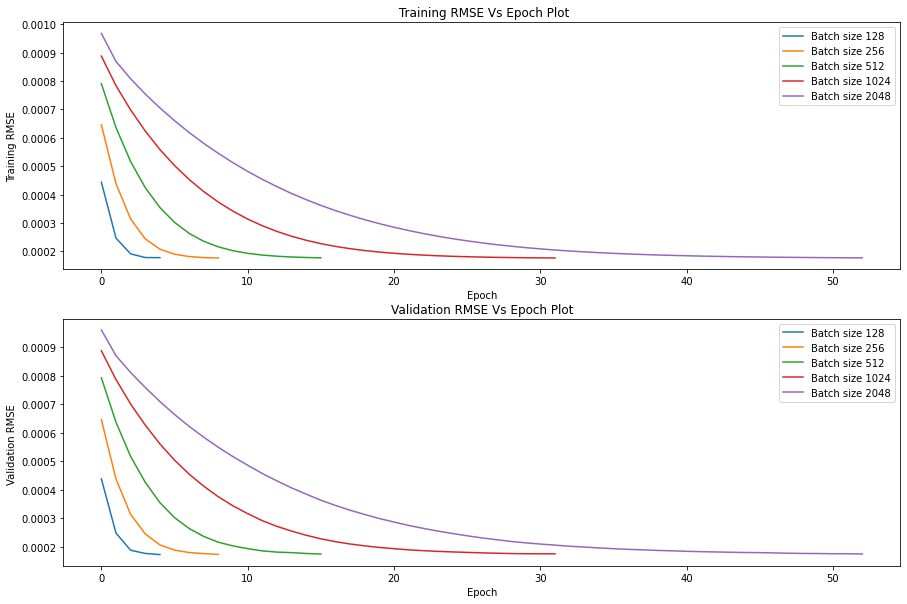

In [32]:
## Plotting separate RMSE curves for training as well as validation set 

batch_number = [128,256,512,1024,2048] #  Selecting different range of batch size to see the proper scaling of RMSE 

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in batch_number:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, i, 0.01, ct)
    
    axes.flat[0].plot(rmse_train, label='Batch size '+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='Batch size '+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')

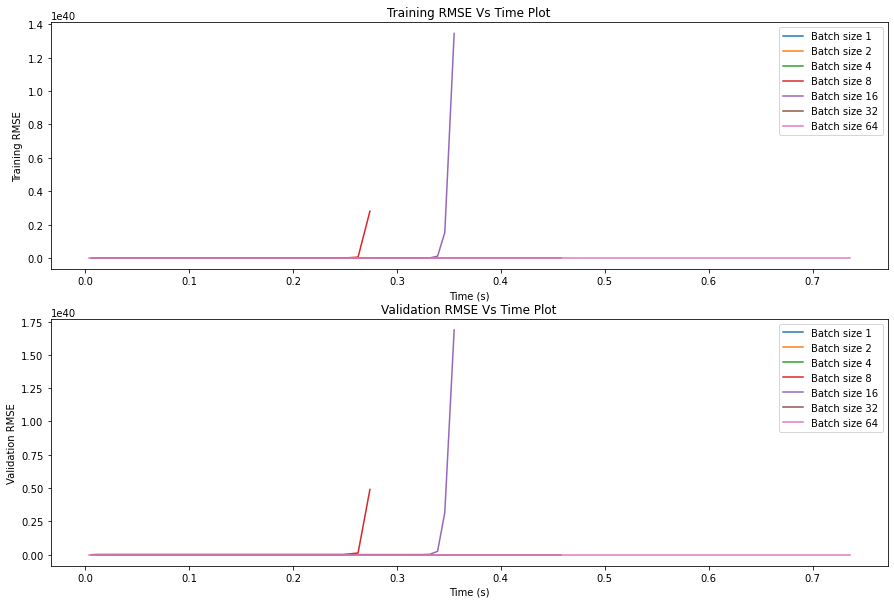

In [33]:
## Plotting separate Time curves for training as well as validation set

batch_number = [1,2,4,8,16,32,64]
fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in batch_number:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, i, 0.01, ct)
    
    axes.flat[0].plot(total_time, rmse_train, label='Batch size '+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title='Training RMSE Vs Time Plot',xlabel='Time (s)',ylabel='Training RMSE')
    
    axes.flat[1].plot(total_time, rmse_test, label='Batch size '+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Time Plot', xlabel='Time (s)',ylabel='Validation RMSE')

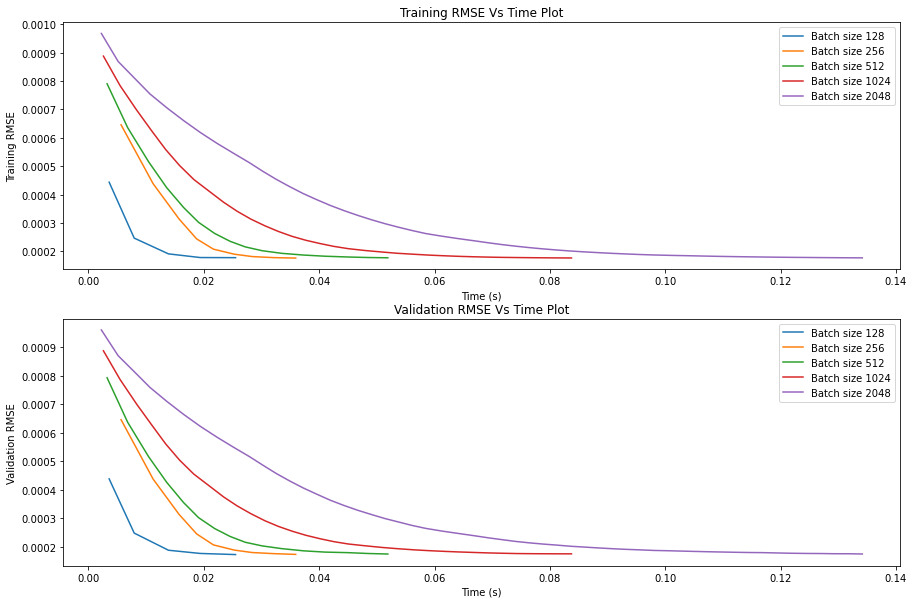

In [34]:
## Plotting separate Time curves for training as well as validation set

batch_number = [128,256,512,1024,2048] #  Selecting different range of batch size to see the proper scaling of RMSE value

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in batch_number:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, i, 0.01, ct)
    
    axes.flat[0].plot(total_time, rmse_train, label='Batch size '+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title='Training RMSE Vs Time Plot',xlabel='Time (s)',ylabel='Training RMSE')
    
    axes.flat[1].plot(total_time, rmse_test, label='Batch size '+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Time Plot', xlabel='Time (s)',ylabel='Validation RMSE')

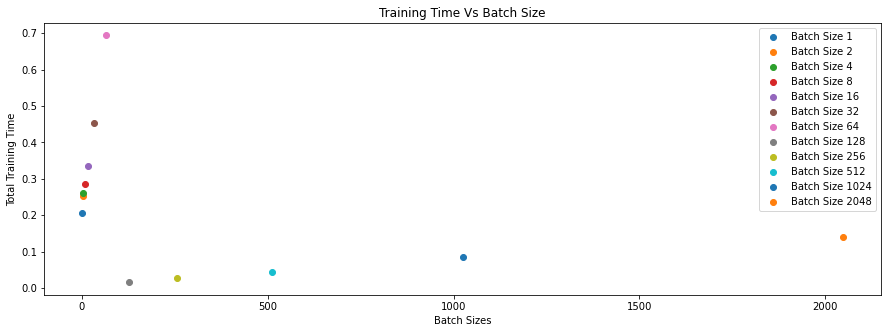

In [35]:
## Plotting training vs batch size plot

batch_number = [1,2,4,8,16,32,64,128,256,512,1024,2048]

fig, axes = plt.subplots(figsize=(15,5))

for i in batch_number:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, i, 0.01, ct)
    
    axes.scatter(i,total_time[-1], label='Batch Size '+ str(i))
    axes.legend()
    axes.set(title='Training Time Vs Batch Size', xlabel='Batch Sizes',ylabel='Total Training Time')


- Till batch size of 64, the graph is not converging but after the batch size of 128, the graph start converging.
- Training and validation set follows the same pattern of convergence more or less.
- More the number of batch size the more it is taking time to converge, refer training vs batch size. Time is proportional to batch size.
- validation rmse shows more value than the training one

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. What is the largest learning rate that you can find so that the non-converging batch sizes in the last part converge to a solution. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

Batch number=1
Largest lr value= 0.0001
RMSE training: [0.0009036467390095553, 0.0007992858536282032, 0.0007185806815686772]
RMSE test: [0.000901043921404035, 0.0008011839606412371, 0.0007205469102750607]


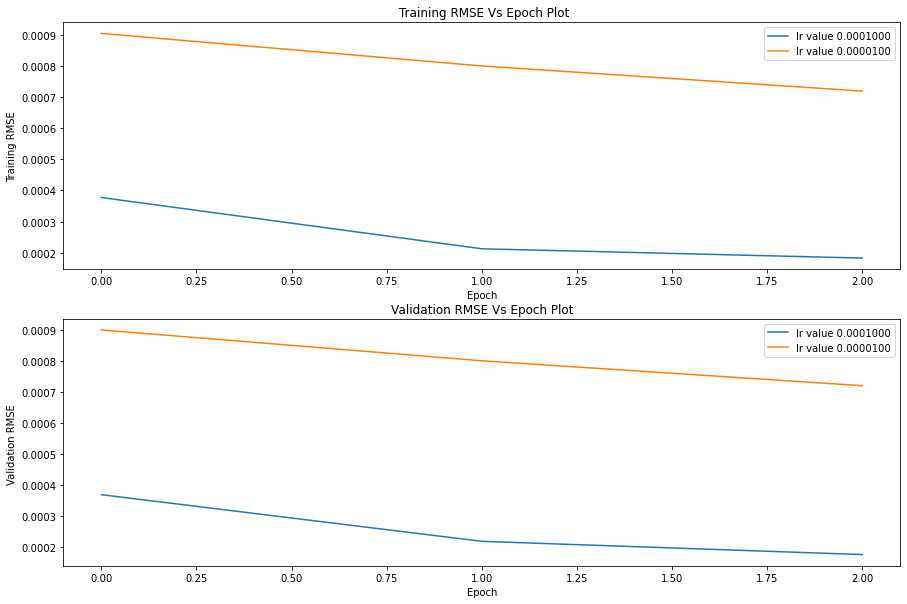

In [36]:
# Using the differlearnig rate  and trial checking of the convergence

## Plotting separate RMSE curves for training as well as validation set
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.0001,0.00001]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 1, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.7f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.7f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')
    
print('Batch number=1')
print('Largest lr value= 0.0001')
print('RMSE training:', rmse_train)
print('RMSE test:',rmse_test)

Batch number=2
Largest lr value= 0.0001
RMSE training: [0.0010201169505066397, 0.0009046163587375301, 0.0008456535230699534, 0.0007993117164841303, 0.0007576119688830268, 0.0007187303799764468]
RMSE test: [0.0010081840679348182, 0.0009020379589644797, 0.0008467557559259542, 0.0008017328858376754, 0.0007601589123783594, 0.0007210589949063099]


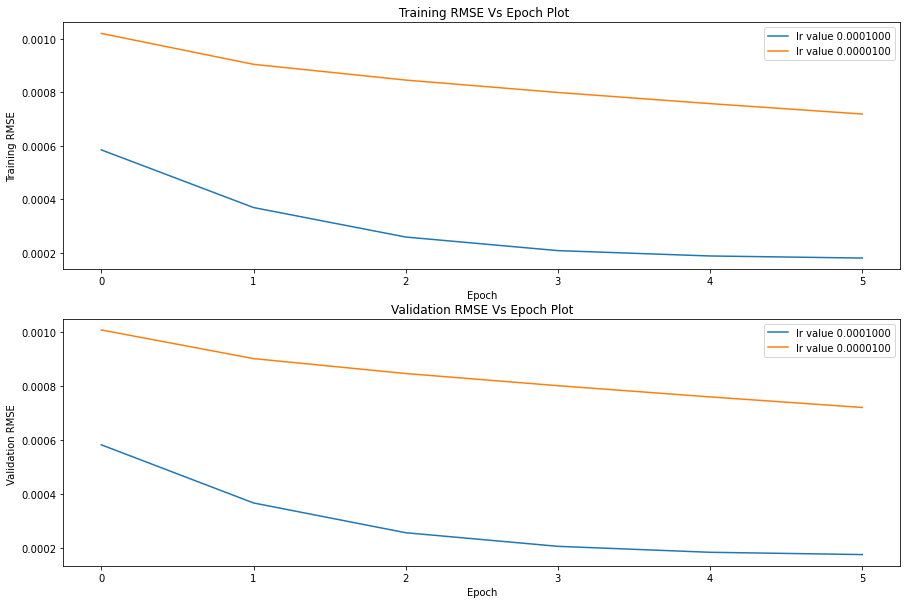

In [37]:
# Using the different learnig rate  and trial checking of the convergence

## Plotting separate RMSE curves for training as well as validation set
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.0001,0.00001]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 2, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.7f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.7f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')
    
print('Batch number=2')
print('Largest lr value= 0.0001')
print('RMSE training:', rmse_train)
print('RMSE test:',rmse_test)

Batch number=4
Largest lr value= 0.0001
RMSE training: [0.0011510143021807593, 0.0010207827559705867, 0.0009491183962296519, 0.0009044207537438616, 0.0008722706523153334, 0.0008456629103088838, 0.000821753361146092, 0.0007994469435378091, 0.0007781509630591758, 0.0007576769234966339, 0.0007379032500323565]
RMSE test: [0.0011310355968652632, 0.0010088537636418545, 0.000942949550298806, 0.0009020472954794109, 0.0008721809227704492, 0.0008469209714143381, 0.0008238061725812097, 0.0008018775345903793, 0.0007807733614236415, 0.0007603408692721337, 0.0007405321723357731]


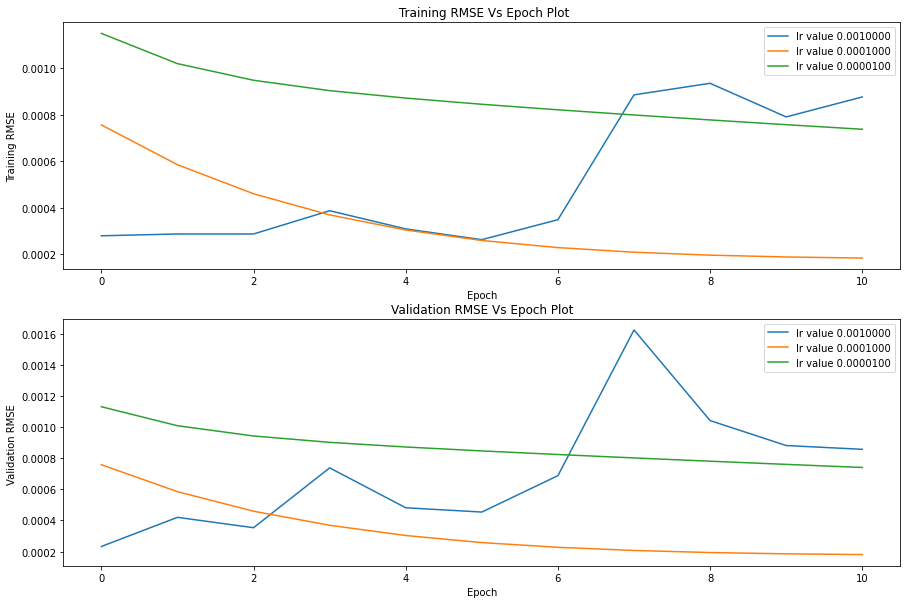

In [38]:
# Using the different learnig rate  and trial checking of the convergence

## Plotting separate RMSE curves for training as well as validation set
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.001,0.0001,0.00001]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 4, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.7f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.7f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')
    
print('Batch number=4')
print('Largest lr value= 0.0001')
print('RMSE training:', rmse_train)
print('RMSE test:',rmse_test)

Batch number=8
Largest lr value= 0.001


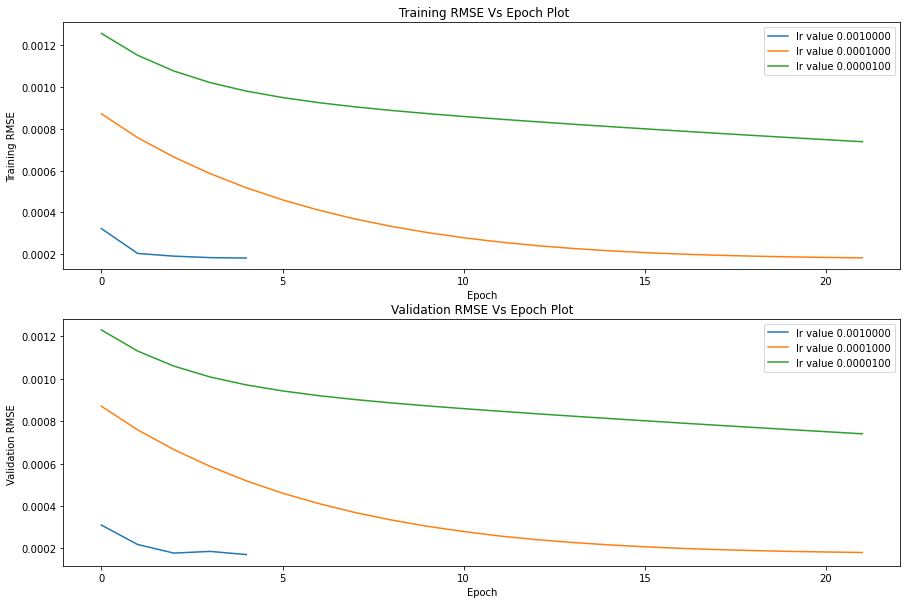

In [39]:
# Using the different learnig rate  and trial checking of the convergence

## Plotting separate RMSE curves for training as well as validation set
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.001,0.0001,0.00001]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 8, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.7f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.7f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')
    
print('Batch number=8')
print('Largest lr value= 0.001')
#print('RMSE training:', rmse_train)
#print('RMSE test:',rmse_test)

Batch number=16
Largest lr value= 0.001


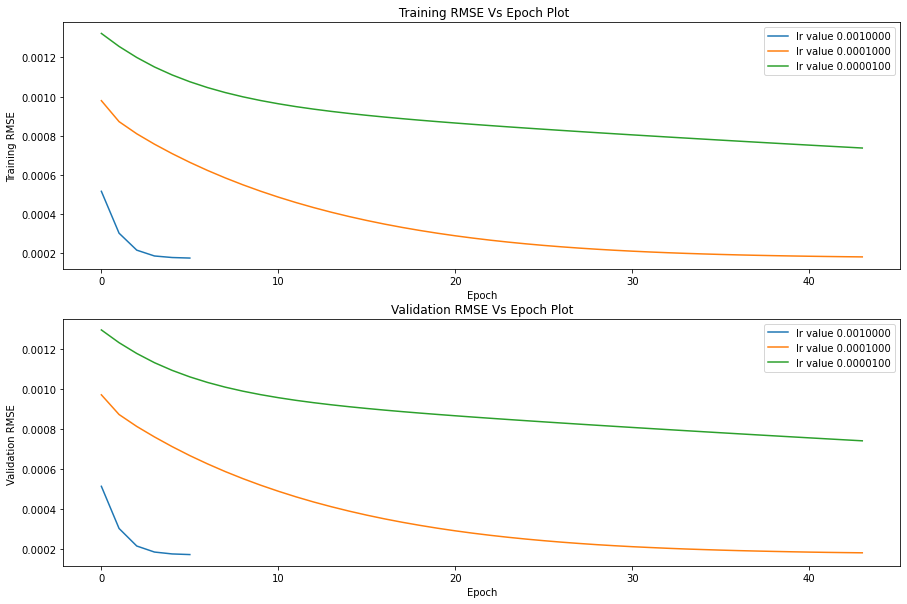

In [40]:
# Using the different learnig rate  and trial checking of the convergence

## Plotting separate RMSE curves for training as well as validation set
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.001,0.0001,0.00001]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 16, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.7f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.7f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')
    
print('Batch number=16')
print('Largest lr value= 0.001')
#print('RMSE training:', rmse_train)
#print('RMSE test:',rmse_test)

Batch number=64
Largest lr value= 0.001


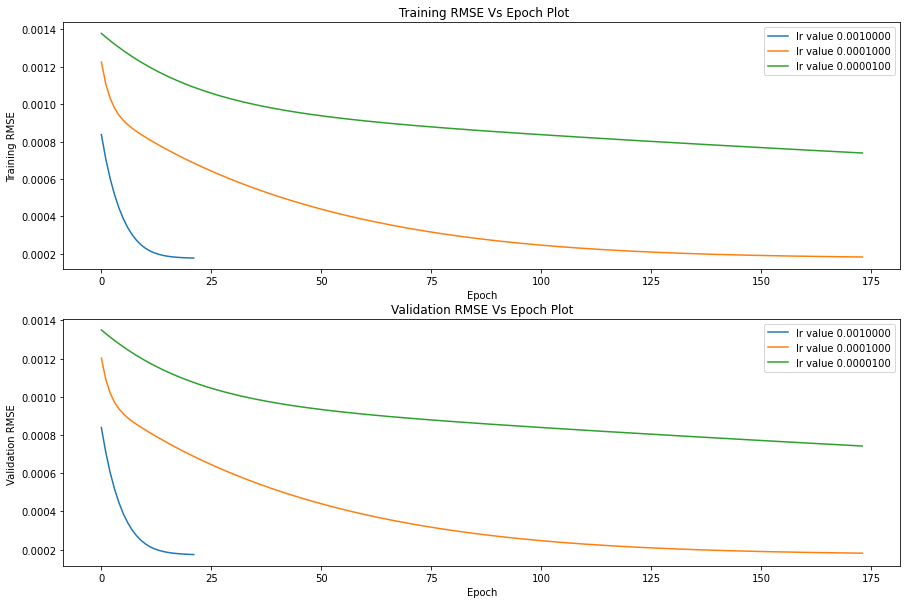

In [41]:
#### Using the different learnig rate  and trial checking of the convergence

## Plotting separate RMSE curves for training as well as validation set
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.001,0.0001,0.00001]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 64, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.7f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.7f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')
    
print('Batch number=64')
print('Largest lr value= 0.001')
#print('RMSE training:', rmse_train)
#print('RMSE test:',rmse_test)

- Fastest convergence value is 128 after looking at the time vs batch number plot

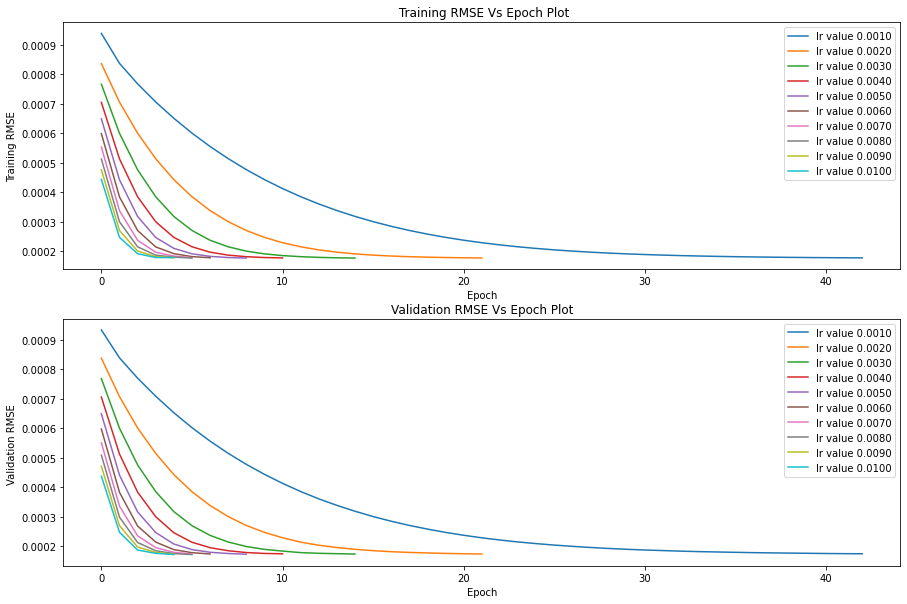

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.001,0.002,.003,.004,.005,.006,.007,.008,.009,.010]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 128, i, ct)
    
    axes.flat[0].plot(rmse_train, label='lr value '+ "{:.4f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='lr value '+ "{:.4f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot',xlabel='Epoch',ylabel='Validation RMSE ')

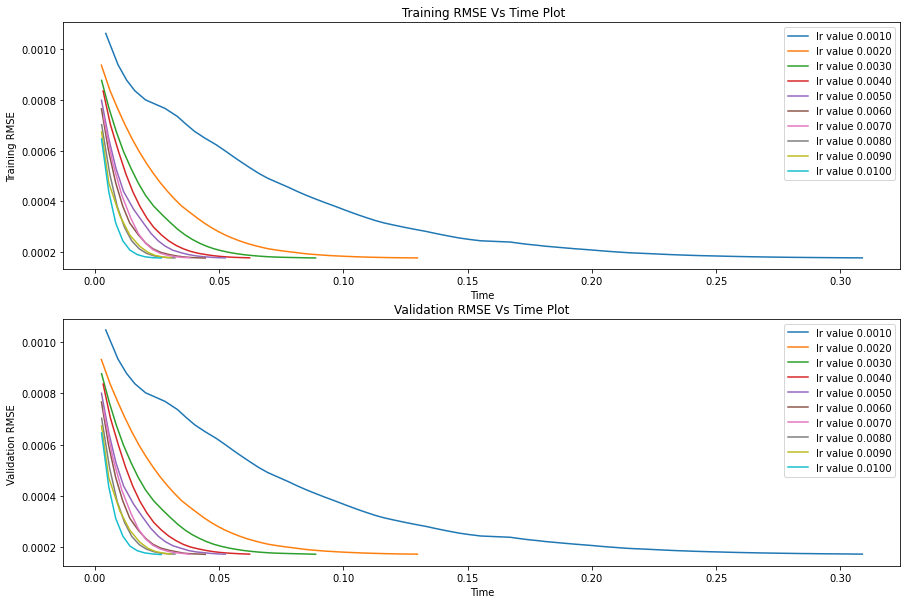

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

lr_list=[0.001,0.002,.003,.004,.005,.006,.007,.008,.009,.010]

for i in lr_list:
    w, rmse_train, rmse_test, total_time = gd_batch(X_train, y_train, X_test,y_test, 256, i, ct)
    
    axes.flat[0].plot(total_time,rmse_train, label='lr value '+ "{:.4f}".format(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Time Plot',xlabel='Time', ylabel='Training RMSE')
    
    axes.flat[1].plot(total_time,rmse_test, label='lr value '+ "{:.4f}".format(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Time Plot',xlabel='Time',ylabel='Validation RMSE ')

- As the learning rate values are decreasing then the time taken for convergence also decreasing.
- Similary as LR rate decrease then the convergence take place as lower epoch number.
- Training and validation graph pattern looks similar.
- Smoothness of the graph increase as lr value increases.

## Part 6 - Introducing Momentum [1.5 marks]
Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, where $\alpha$ is the learning rate and $g_t$ is your gradient (weight updates), the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$.

 $\beta$ is the momentum coefficient, between [0, 1]. Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also are a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

Pick one of your best models from the previous part and try to investigate the effect of momentum.
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the momentums that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the momentums that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [44]:
def momemtum(X_train,y_train, X_test,y_test,batch_size ,lr ,ct,b):
    
    start_time = time.time()
    np.random.seed(2) ## Initialization
    n = X_train.shape[0] # shape of the training set
    
    w = (np.random.random(X_train.shape[1])/10000).reshape(1,-1) # Initial Weight
    
    #b=0
    
    total_time = [] #Time array to store time data
    rmse_train = [] # RMSE training data
    rmse_test = []  # RMSE testing data
    
    
    row_num = 0 #Initial row numner
    max_iter=30000 # Max iteration number
    
    iter = 0 #Initial iteration value
    
    #for iter in range(0,max_iter): 
    while iter <= max_iter:
        x_shuffle, y_shuffle = shuffle(X_train, y_train)  # Shuffling

        ## Start of each itiration
        for i in range(0, x_shuffle.shape[0], batch_size):
            X_batch = x_shuffle[i:i+batch_size]
            y_batch = y_shuffle[i:i+batch_size]
            ytrain1 = np.dot(X_batch, w.T).reshape(-1,1)
            gradient = (1/len(ytrain1) * np.dot(X_batch.T, ytrain1-y_batch)).reshape(1,-1)
            gradient0= b*gradient +(1-b)*(1/len(ytrain1) * np.dot(X_batch.T, ytrain1-y_batch)).reshape(1,-1)
            
            w = w - lr * gradient0 ## Updated weight
            iter += 1
            row_num = i

        if row_num < n: ## Taking scenario when the last mini batch has less rows than batch size
            X_batch = x_shuffle[row_num:]
            y_batch = y_shuffle[row_num:]
            ytrain1 = np.dot(X_batch, w.T).reshape(-1,1)
            gradient = (1/len(ytrain1) * np.dot(X_batch.T, ytrain1-y_batch)).reshape(1,-1)
            gradient0= b*gradient +(1-b)*(1/len(ytrain1) * np.dot(X_batch.T, ytrain1-y_batch)).reshape(1,-1)
            
            w = w - lr * gradient0 ## Updated weight
            iter += 1

        ## Total time consumed at each itiration process
        iti_time = time.time() - start_time
        total_time.append(iti_time)

        ## Training RMSE
        ytrain_iti = np.dot(X_train, w.T).reshape(-1,1)
        rmse_train.append(rmse(ytrain_iti, y_train))

        ## Test RMSE
        ytest_iti = np.dot(X_test, w.T).reshape(-1,1)
        rmse_test.append(rmse(ytest_iti, y_test))

        ## Check for convergence threshold condition
        if rmse(ytest_iti, y_test) <= ct:
            break

    return w, rmse_train, rmse_test, total_time

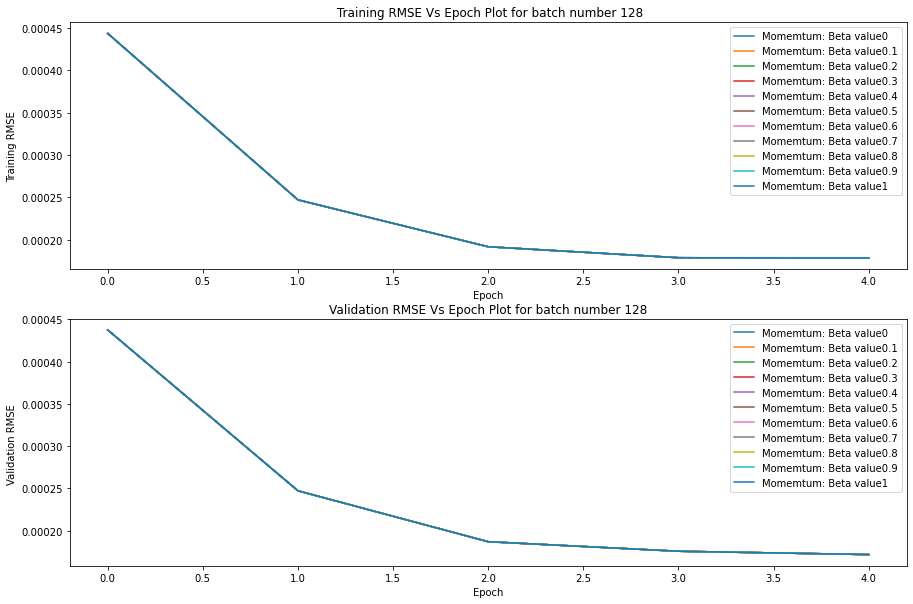

In [45]:
## Plotting separate RMSE curves for training as well as validation set 

momemtum_number = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #  Selecting different range of batch size to see the proper scaling of RMSE 

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in momemtum_number:
    w, rmse_train, rmse_test, total_time = momemtum(X_train, y_train, X_test,y_test,128, 0.01, ct,i)
    
    axes.flat[0].plot(rmse_train, label='Momemtum: Beta value'+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot for batch number 128',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='Momemtum: Beta value'+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot for batch number 128',xlabel='Epoch',ylabel='Validation RMSE ')

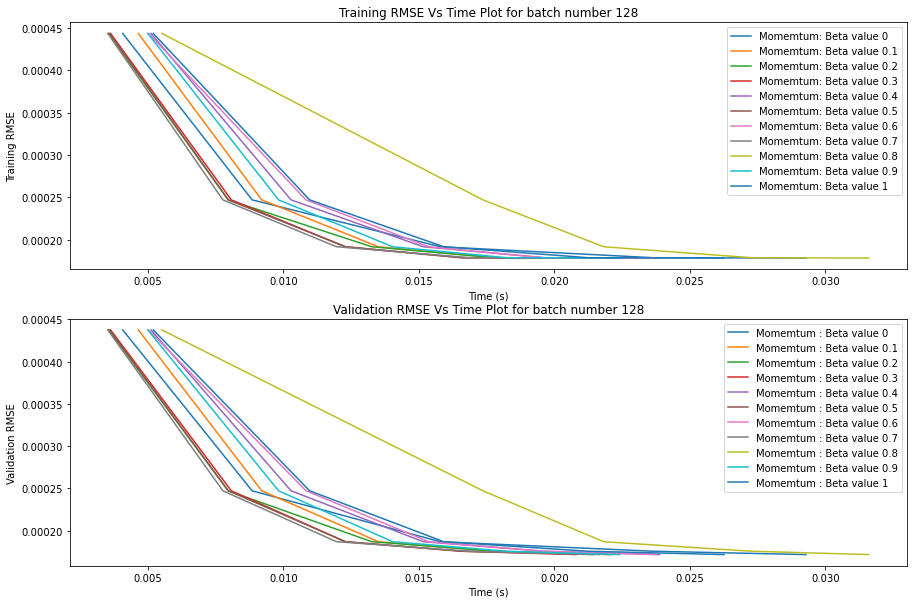

In [46]:
## Plotting separate Time curves for training as well as validation set

momemtum_number = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #  Selecting different range of batch size to see the proper scaling of RMSE value

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in momemtum_number:
    w, rmse_train, rmse_test, total_time = momemtum(X_train, y_train, X_test,y_test,128, 0.01, ct,i)
    
    axes.flat[0].plot(total_time, rmse_train, label='Momemtum: Beta value '+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title='Training RMSE Vs Time Plot for batch number 128',xlabel='Time (s)',ylabel='Training RMSE')
    
    axes.flat[1].plot(total_time, rmse_test, label='Momemtum : Beta value '+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Time Plot for batch number 128', xlabel='Time (s)',ylabel='Validation RMSE')

- The different value of beta resulted varying time difference with same learning rate and batch size. It helped the previous time value to converge faster as can be seen the time plot.
- The convergence vaue wrt epoch value does changes very significantly.
- The pattern in the graph remains same wrt different beta values.

## Part 7 - Finalizing a model [1 marks]
Based on your findings from the previous parts (Parts 1 - 6), pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the training and validation sets. Briefly justify your model selections/settings. Summarize the performance of your model for the task of managing ailerons of an F16 aircraft. In your summary please provide pros and cons of using this linear regression model to solve the problem.

- I will prefer to select combination of model settings:
  - Momemtum model - really help to converge faster and ideal for managing ailerons actuation
  - Max batch size :10000 -helps to control the noise
  - learning rate : 0.001 - part of learning from previous parts
  - beta value: 0.3 - to provide stable controls

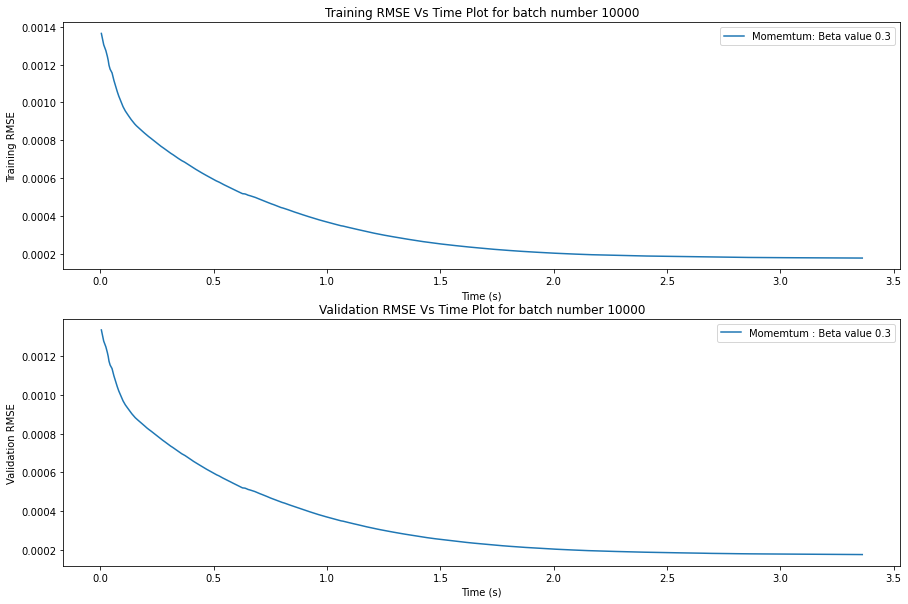

In [47]:
## Plotting separate Time curves for training as well as validation set

momemtum_number = [0.3] #  Selecting different range of batch size to see the proper scaling of RMSE value

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in momemtum_number:
    w, rmse_train, rmse_test, total_time = momemtum(X_train, y_train, X_test,y_test,10000, 0.001, ct,i)
    
    axes.flat[0].plot(total_time, rmse_train, label='Momemtum: Beta value '+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title='Training RMSE Vs Time Plot for batch number 10000',xlabel='Time (s)',ylabel='Training RMSE')
    
    axes.flat[1].plot(total_time, rmse_test, label='Momemtum : Beta value '+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Time Plot for batch number 10000', xlabel='Time (s)',ylabel='Validation RMSE')

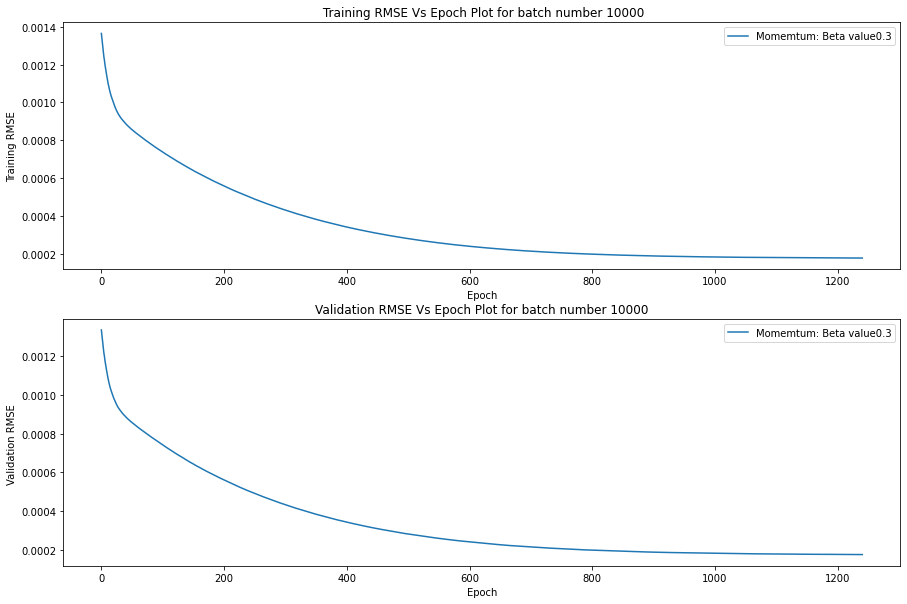

In [48]:
## Plotting separate RMSE curves for training as well as validation set 

momemtum_number = [0.3] #  Selecting different range of batch size to see the proper scaling of RMSE 

fig, axes = plt.subplots(2, 1, figsize=(15,10))

for i in momemtum_number:
    w, rmse_train, rmse_test, total_time = momemtum(X_train, y_train, X_test,y_test,10000, 0.001, ct,i)
    
    axes.flat[0].plot(rmse_train, label='Momemtum: Beta value'+ str(i))
    axes.flat[0].legend()
    axes.flat[0].set(title=' Training RMSE Vs Epoch Plot for batch number 10000',xlabel='Epoch', ylabel='Training RMSE')
    
    axes.flat[1].plot(rmse_test, label='Momemtum: Beta value'+ str(i))
    axes.flat[1].legend()
    axes.flat[1].set(title='Validation RMSE Vs Epoch Plot for batch number 10000',xlabel='Epoch',ylabel='Validation RMSE ')

- Pros:
    - Gives good accuracy due to simple model
    - less takes time 
    - effficient in handling large data with quick controls.
- Cons:
    - Not efficient in dealing very diverse data points
    - increase in noise can cause major accuracy issue

## Part 8 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 7. In this part you will be completing some additional coding tasks using a different dataset and submitting your results onto Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/cMZn2WxY to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/aps1070-2019/project-4-git-******
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “tuhinranjan01@gmail.com”
git config --global user.name “tuhinranjan01”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/aps1070-2019/project-4-git-******
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add Project_4_git.ipynb
git commit -m 'Final Submission'
git push 
```

 9. Make sure your submission is ready for grading. Open the private repository link that you copied below in your browser and make sure you can see your final submission with your latest changes there. 

**Private Repository Link :** https://github.com/aps1070-2019/project-4-git-tuhinranjan01 **[3 marks]**